In [1]:
from taxi_pakage import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
%matplotlib inline

In [3]:
taxi = pd.read_csv('edited_taxi.csv')
taxi = taxi[taxi['trip_duration']<86400].reset_index(drop=True) # 24시간 이상 탑승 제거 -4

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,holiday,holiday_Fri,weekday,trip_duration
1458635,2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,1.224311,98,48663,49441,1,1,5,778
1458636,1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,6.046037,9,27314,27969,1,1,7,655
1458637,2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,7.819693,112,25060,25824,1,1,5,764
1458638,2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,1.091878,4,57385,57758,1,1,2,373
1458639,1209952,1,1,-73.979538,40.781750,-73.972809,40.790585,0,1.133330,95,53064,53262,1,1,2,198


In [4]:
taxi.drop('drop_time', axis=1, inplace=True)
taxi.drop(['holiday_Fri', 'store_and_fwd_flag', 'id'], axis=1, inplace=True)

In [15]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~  \
                             scale(np.log(dist+1)) \
                             +np.log(weekday//dist+1) \
                             + scale(np.log(pick_time+1))", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.594
Model:                               OLS   Adj. R-squared:                  0.594
Method:                    Least Squares   F-statistic:                 7.095e+05
Date:                   Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                           23:44:16   Log-Likelihood:            -1.0595e+06
No. Observations:                1452743   AIC:                         2.119e+06
Df Residuals:                    1452739   BIC:                         2.119e+06
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.6278      0.001   8918.251      0.000       6.626       6.629
scale(np.log(dist + 1))          0.4929      0.001    842.378      0.000       0.492       0.494
np.log(weekday // dist + 1)     -0.1927      0.001   -264.682      0.000      -0.194      -0.191
scale(np.log(pick_time + 1))     0.0532      0.000    127.141      0.000       0.052       0.054
==============================================================================
Omnibus:                   521242.161   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13723540.409
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                      17.879   Cond. No.                         3.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~  \
                             scale(np.log(dist+1)) \
                             + np.log(weekday//dist+1) \
                             + scale(np.log(pick_time+1)) \
                             + scale(np.log(abs(pickup_longitude))) + scale(np.log(pickup_latitude)) \
                             + scale(np.log(abs(dropoff_longitude))) + scale(np.log(dropoff_latitude)) \
                             ", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.599
Model:                               OLS   Adj. R-squared:                  0.599
Method:                    Least Squares   F-statistic:                 3.094e+05
Date:                   Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                           23:58:18   Log-Likelihood:            -1.0520e+06
No. Observations:                1452743   AIC:                         2.104e+06
Df Residuals:                    1452735   BIC:                         2.104e+06
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 6.6253      0.001   8874.680      0.000       6.624       6.627
scale(np.log(dist + 1))                   0.5008      0.001    802.505      0.000       0.500       0.502
np.log(weekday // dist + 1)              -0.1899      0.001   -258.618      0.000      -0.191      -0.188
scale(np.log(pick_time + 1))              0.0540      0.000    129.480      0.000       0.053       0.055
scale(np.log(abs(pickup_longitude)))      0.0166      0.001     27.175      0.000       0.015       0.018
scale(np.log(pickup_latitude))            0.0108      0.001     21.305      0.000       0.010       0.012
scale(np.log(abs(dropoff_longitude)))     0.0242      0.001     39.853      0.000       0.023       0.025
scale(np.log(dropoff_latitude))          -0.0375      0.000    -76.223      0.000      -0.038      -0.037
==============================================================================
Omnibus:                   551229.967   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36197250.395
Skew:                           0.994   Prob(JB):                         0.00
Kurtosis:                      27.373   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# 0.6 / 4.02
model =  sm.OLS.from_formula("np.log(trip_duration) ~  \ 
                             scale(np.log(dist+1)) \
                             + np.log(weekday//dist+1) \
                             + scale(np.log(pick_time+1)) \
                             + scale(np.log(abs(pickup_longitude))) + scale(np.log(pickup_latitude)) \
                             + scale(np.log(abs(dropoff_longitude))) + scale(np.log(dropoff_latitude)) \
                             + scale(np.cbrt(pick_date))\
                             ", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.600
Model:                               OLS   Adj. R-squared:                  0.600
Method:                    Least Squares   F-statistic:                 2.721e+05
Date:                   Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                           00:25:49   Log-Likelihood:            -1.0497e+06
No. Observations:                1452743   AIC:                         2.099e+06
Df Residuals:                    1452734   BIC:                         2.099e+06
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 6.6249      0.001   8887.817      0.000       6.623       6.626
scale(np.log(dist + 1))                   0.5005      0.001    803.364      0.000       0.499       0.502
np.log(weekday // dist + 1)              -0.1894      0.001   -258.366      0.000      -0.191      -0.188
scale(np.log(pick_time + 1))              0.0540      0.000    129.667      0.000       0.053       0.055
scale(np.log(abs(pickup_longitude)))      0.0165      0.001     27.062      0.000       0.015       0.018
scale(np.log(pickup_latitude))            0.0108      0.001     21.296      0.000       0.010       0.012
scale(np.log(abs(dropoff_longitude)))     0.0243      0.001     40.075      0.000       0.023       0.025
scale(np.log(dropoff_latitude))          -0.0375      0.000    -76.335      0.000      -0.038      -0.037
scale(np.cbrt(pick_date))                 0.0280      0.000     67.602      0.000       0.027       0.029
==============================================================================
Omnibus:                   551206.347   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36608150.322
Skew:                           0.991   Prob(JB):                         0.00
Kurtosis:                      27.512   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

In [10]:
taxi['overtime'] = taxi['trip_duration'].apply(lambda x: 'too long' if x > 80000 else 'too short' if x <60 else 1 )

In [38]:
taxi['overtime2'] = taxi['trip_duration'].apply(lambda x: 0 if x > 80000 else 1 )

In [39]:
taxi['new_dist'] = taxi['dist']*taxi['overtime2']

In [43]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ overtime+ scale(np.log(new_dist+1))+0", data=taxi) 
result = model.fit()
print(result.rsquared)
result.summary()

0.662115208279


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.662
Model:                               OLS   Adj. R-squared:                  0.662
Method:                    Least Squares   F-statistic:                 9.528e+05
Date:                   Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                           11:48:54   Log-Likelihood:            -9.5197e+05
No. Observations:                1458640   AIC:                         1.904e+06
Df Residuals:                    1458636   BIC:                         1.904e+06
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
overtime[1]                     6.4710      0.000   1.68e+04      0.000       6.470       6.472
overtime[too long]             12.4992      0.011   1167.713      0.000      12.478      12.520
overtime[too short]             4.0313      0.005    796.163      0.000       4.021       4.041
scale(np.log(new_dist + 1))     0.5733      0.000   1471.103      0.000       0.573       0.574
==============================================================================
Omnibus:                    68441.532   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220421.181
Skew:                           0.153   Prob(JB):                         0.00
Kurtosis:                       4.880   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

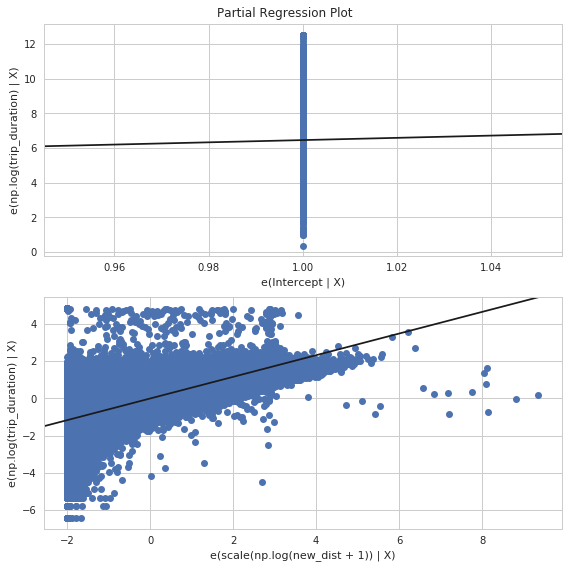

In [41]:
fig = plt.figure(figsize=(8, 8))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

In [47]:
model =  sm.OLS.from_formula("trip_duration ~ overtime + 0", data=taxi) 
result = model.fit()
print(result.rsquared)
result.summary()

0.92493059143


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 8.986e+06
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:53:58   Log-Likelihood:            -1.1941e+07
No. Observations:             1458640   AIC:                         2.388e+07
Df Residuals:                 1458637   BIC:                         2.388e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
overtime[1]           847.6744      0.722   1173.988      0.000     846.259     849.090
overtime[too long]    8.55e+04     19.960   4283.408      0.000    8.55e+04    8.55e+04
overtime[too short]    27.4185      9.372      2.925      0.003       9.049      45.788
==============================================================================
Omnibus:                  3880002.969   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     331200879211.241
Skew:                          31.521   Prob(JB):                         0.00
Kurtosis:                    2336.560   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model =  sm.OLS.from_formula("trip_duration ~ overtime + scale(new_dist) + 0", data=taxi) 
result = model.fit()
print(result.rsquared)
result.summary()

0.946735876719


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 8.642e+06
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:53:01   Log-Likelihood:            -1.1690e+07
No. Observations:             1458640   AIC:                         2.338e+07
Df Residuals:                 1458636   BIC:                         2.338e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
overtime[1]           845.0356      0.608   1389.366      0.000     843.844     846.228
overtime[too long]   8.587e+04     16.820   5105.344      0.000    8.58e+04    8.59e+04
overtime[too short]   389.2459      7.909     49.218      0.000     373.745     404.746
scale(new_dist)       469.3221      0.607    772.746      0.000     468.132     470.513
==============================================================================
Omnibus:                  4355756.794   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1960879129101.198
Skew:                          42.554   Prob(JB):                         0.00
Kurtosis:                    5682.475   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

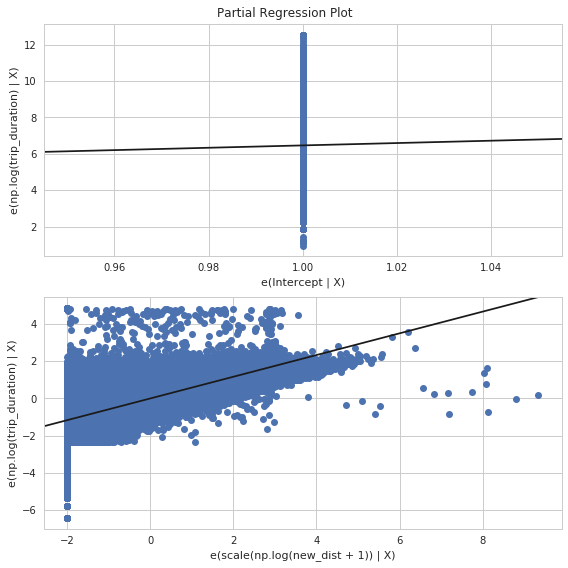

In [34]:
fig = plt.figure(figsize=(8, 8))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

---

## 0.395 / 2.54
- np.log(trip_duration) ~ I(np.log(weekday//dist+1)

In [224]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ np.log(weekday//dist+1)", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.395
Model:                               OLS   Adj. R-squared:                  0.395
Method:                    Least Squares   F-statistic:                 9.503e+05
Date:                   Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:40:18   Log-Likelihood:            -1.3493e+06
No. Observations:                1452743   AIC:                         2.699e+06
Df Residuals:                    1452741   BIC:                         2.699e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.9919      0.001   9469.418      0.000       6.990       6.993
np.log(weekday // dist + 1)    -0.6210      0.001   -974.858      0.000      -0.622      -0.620
==============================================================================
Omnibus:                   273520.242   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3101619.966
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      10.065   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

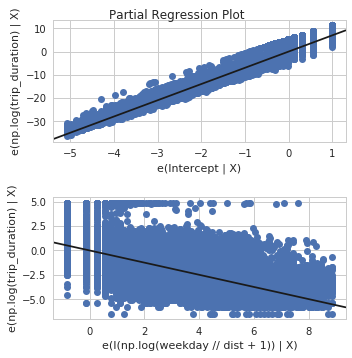

In [182]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

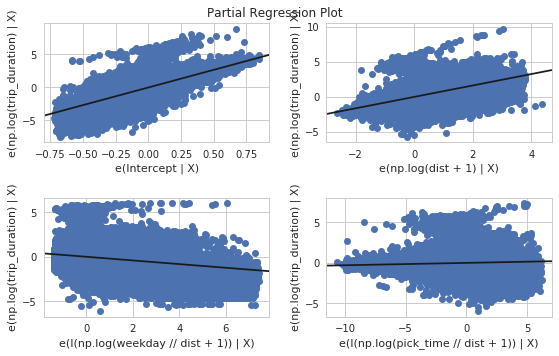

In [197]:
fig = plt.figure(figsize=(8, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.tight_layout()
plt.show()

## R- 0.561 / cond.no. 1
np.log(trip_duration) ~ scale(np.log(dist+1))

In [229]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.log(dist+1))", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.561
Model:                               OLS   Adj. R-squared:                  0.561
Method:                    Least Squares   F-statistic:                 1.860e+06
Date:                   Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:44:54   Log-Likelihood:            -1.1437e+06
No. Observations:                1458640   AIC:                         2.287e+06
Df Residuals:                    1458638   BIC:                         2.287e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.4645      0.000   1.47e+04      0.000       6.464       6.465
scale(np.log(dist + 1))     0.5986      0.000   1363.918      0.000       0.598       0.599
==============================================================================
Omnibus:                   350667.235   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12841105.389
Skew:                           0.444   Prob(JB):                         0.00
Kurtosis:                      17.508   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

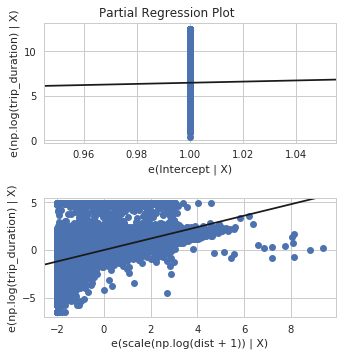

In [230]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.tight_layout()
plt.show()

# d

In [234]:
model =  sm.OLS.from_formula(
    "trip_duration ~ scale(dropoff_latitude*dropoff_longitude)", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2995.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:46:17   Log-Likelihood:            -1.3828e+07
No. Observations:             1458640   AIC:                         2.766e+07
Df Residuals:                 1458638   BIC:                         2.766e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     952.8153      2.623    363.235      0.000     947.674     957.957
scale(dropoff_latitude * dropoff_longitude)   143.5494      2.623     54.724      0.000     138.408     148.691
==============================================================================
Omnibus:                  3506410.197   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27427265600.084
Skew:                          25.350   Prob(JB):                         0.00
Kurtosis:                     672.857   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

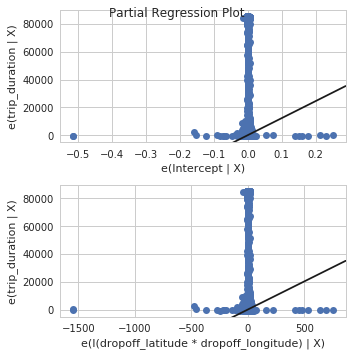

In [219]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.tight_layout()
plt.show()

# DDDD

In [113]:
test, Dropped = erase_outlier_np(result, test, feature_n+6, category=True, dropped=True)

In [117]:
model =  sm.OLS.from_formula("trip_duration ~ C(weekday)+ {}+0".format(features), data=test) #5번제거
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 2.744e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:24:19   Log-Likelihood:            -7.6517e+06
No. Observations:             1152796   AIC:                         1.530e+07
Df Residuals:                 1152783   BIC:                         1.530e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(weekday)[0.0]     767.5630      0.329   2333.974      0.000     766.918     768.208
C(weekday)[1.0]     774.5883      0.495   1566.062      0.000     773.619     775.558
C(weekday)[2.0]     813.6715      0.483   1683.836      0.000     812.724     814.619
C(weekday)[3.0]     821.8493      0.477   1721.793      0.000     820.914     822.785
C(weekday)[4.0]     827.7400      0.468   1769.025      0.000     826.823     828.657
C(weekday)[5.0]     822.7899      0.458   1797.624      0.000     821.893     823.687
pickup_longitude    -70.7551      0.719    -98.428      0.000     -72.164     -69.346
pickup_latitude      41.2843      0.352    117.437      0.000      40.595      41.973
dropoff_longitude   -75.9253      0.710   -106.925      0.000     -77.317     -74.534
dropoff_latitude    -46.6843      0.340   -137.258      0.000     -47.351     -46.018
dist                735.3706      0.425   1732.021      0.000     734.538     736.203
pick_date             7.4003      0.173     42.813      0.000       7.061       7.739
pick_time            20.1696      0.173    116.674      0.000      19.831      20.508
==============================================================================
Omnibus:                    45516.818   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47402.476
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                       2.680   Cond. No.                         5.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""